In [1]:
import numpy
import matplotlib.pyplot
%matplotlib inline 

In [11]:
class Perceptron:
    def __init__(self,training_data_size):
        self.training_data_size=training_data_size
        self.randomize_line()
        self.randomize_training_data()

        self.steps=0
        self.weights = numpy.zeros((3,1))
        self.train()
#         print(self.steps)        
        
        self.plot_training_data()
        self.plot_lines()
    
        self.test()
#         print(self.probability_of_wrong)
        
    def train(self):
        while(True):
            wrong_answer_exists=False
            incorrect_answers = self.training_data[:]
            answers = self.training_data_answers[:]
            while(incorrect_answers):
                index = numpy.random.randint(0,len(incorrect_answers))
                answer = numpy.sign(numpy.dot(self.weights.T,incorrect_answers[index]))
                if(answer!=answers[index]):
                    self.steps+=1
                    self.weights = self.weights+incorrect_answers[index]*answers[index]
                    wrong_answer_exists=True
                else:
                    del incorrect_answers[index]
                    del answers[index]
            if(wrong_answer_exists==False):
                break
    
    def test(self):
        correct=0
        wrong=0
        for i in range(5000):
            data=numpy.random.uniform(-1,1,3)
            correct_answer = self.point_position(data)
            learn_answer = self.answer_point_position(data)
            if(correct_answer==learn_answer):
                correct+=1
            else:
                wrong+=1
        self.probability_of_wrong=wrong/(correct+wrong)
    
    def randomize_line(self):
        # randomize two points [x1,y1] and [x2,y2] in range [-1,1]x[-1,1]
        self.origin_line_x = numpy.random.uniform(-1,1,2)
        self.origin_line_y = numpy.random.uniform(-1,1,2)
        
        # find coefficients a and b of equation y=ax+b
        self.origin_line_coefficients = numpy.polyfit(self.origin_line_x,self.origin_line_y,1)
        # create polynomial coefs[0]x + coefs[1]
        self.origin_line_polynomial = numpy.poly1d(self.origin_line_coefficients)     
        
    def randomize_training_data(self):
        self.training_data=[]
        self.training_data_answers=[]
        for i in range(self.training_data_size):
            new_data = numpy.random.uniform(-1,1,2).tolist()
            # x0 is always 1 for bias
            new_data.insert(0,1)
            self.training_data.append(numpy.array(new_data,ndmin=2).T)
            self.training_data_answers.append(self.point_position(new_data))
     
    # returns 1 if point is above origin line and -1 otherwise
    def point_position(self,new_example):
        origin_y = self.origin_line_polynomial(new_example[1])
        return 1 if new_example[2] > origin_y else -1
    
    def answer_point_position(self,new_example):
        origin_y = self.answer_line_polynomial(new_example[1])
        return 1 if new_example[2] > origin_y else -1
        
    def plot_training_data(self):
        for i in range(len(self.training_data)):
            if self.training_data_answers[i]==1:
                matplotlib.pyplot.plot(self.training_data[i][1],self.training_data[i][2],'g.')
            elif self.training_data_answers[i]==-1:
                matplotlib.pyplot.plot(self.training_data[i][1],self.training_data[i][2],'r.')
    
    def plot_lines(self):
        # plot result line
        self.answer_line_polynomial = numpy.poly1d([(self.weights[1]/(-self.weights[2]))[0],(self.weights[0]/(-self.weights[2]))[0]])
        answer_points_x = numpy.linspace(-5,5,500)
        answer_points_y = self.answer_line_polynomial(answer_points_x)
        matplotlib.pyplot.plot(answer_points_x,answer_points_y)
        
        # plot real line
        # find line's points
        origin_points_x = numpy.linspace(-1,1,100)
        origin_points_y = self.origin_line_polynomial(origin_points_x)
        # plot the line
        matplotlib.pyplot.plot(origin_points_x,origin_points_y)
        # plot starting random points
        matplotlib.pyplot.plot(self.origin_line_x[0],self.origin_line_y[0],'bo')
        matplotlib.pyplot.plot(self.origin_line_x[1],self.origin_line_y[1],'bo')
        
        matplotlib.pyplot.axis([-1,1,-1,1])
        matplotlib.pyplot.show()

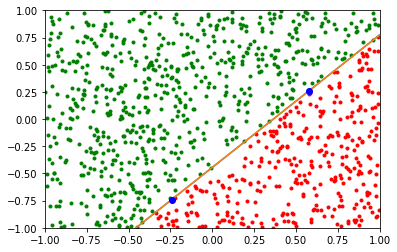

Probability of wrong answer:  0.0
Steps taken:  4828.0


In [13]:
cycles = 1
input_size = 1000
total_probability_of_wrong_answer=0
total_steps=0
for i in range(cycles):
    n = Perceptron(input_size)
    total_probability_of_wrong_answer+=n.probability_of_wrong
    total_steps+=n.steps
print('Probability of wrong answer: ',total_probability_of_wrong_answer/cycles)
print('Steps taken: ',total_steps/cycles)